# DBSCAN

Density-based Spatial Clustering of applications with Noise works based on density of object. It works on Radius(R) and Minimum number of neighbours(M). <br>
### Advantages :-
* Arbitary shaped clusters
* Robust to outliers
* Does not require specification of number of clusters

### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

### Loading the data

In [2]:
data = pd.read_csv("WeatherStations.csv")
data = data[pd.notnull(data["Tm"])]
data = data.reset_index(drop=True)

In [3]:
llon = -140
ulon = -50
llat = 40
ulat = 65

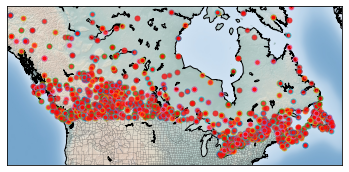

In [4]:
"""
This code block performs the following steps:
1. Filters the data based on longitude and latitude values.
2. Creates a Basemap object with specified projection and map boundaries.
3. Draws coastlines, counties, and continents on the map.
4. Generates shaded relief on the map.
5. Converts longitude and latitude coordinates to map coordinates.
6. Plots the data points on the map.
7. Displays the map.
"""

data = data[(data["Long"] > llon) & (data["Long"] < ulon) & (data["Lat"] > llat) &(data["Lat"] < ulat)]
my_map = Basemap(projection="merc", resolution="l", area_thresh=1000.0, llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat)
my_map.drawcoastlines()
my_map.drawcounties()
my_map.fillcontinents(color="white", alpha=0.3)
my_map.shadedrelief()
Xs, Ys = my_map(np.asarray(data.Long), np.asarray(data.Lat))
data["Xm"] = Xs.tolist()
data["Ym"] = Ys.tolist()
for index, row in data.iterrows():
    my_map.plot(row.Xm, row.Ym, markerfacecolor=([1,0,0]), marker="o", markersize=5, alpha=0.75)
plt.show()

In [5]:
# Set random state
sklearn.utils.check_random_state(1000)

# Prepare data for clustering
clust_data = data[["Xm", "Ym"]]
clust_data = np.nan_to_num(clust_data)
clust_data = StandardScaler().fit_transform(clust_data)

# Perform DBSCAN clustering
db = DBSCAN(eps=0.15, min_samples=10).fit(clust_data)

# Identify core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Get cluster labels
labels = db.labels_

# Assign cluster labels to data points
data["Clust_DB"] = labels

# Calculate the number of real clusters and total clusters
real_Cluster_num = len(set(labels)) - (1 if -1 in labels else 0)
cluster_num = len(set(labels))

Cluster : 0 and Average temperature : -5.538747553816046
Cluster : 1 and Average temperature : 1.9526315789473685
Cluster : 2 and Average temperature : -9.195652173913045
Cluster : 3 and Average temperature : -15.300833333333333
Cluster : 4 and Average temperature : -7.769047619047619


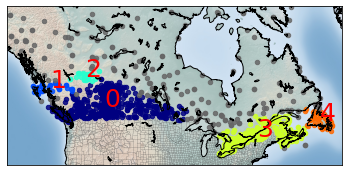

In [6]:
"""
This code snippet creates a scatter plot on a Basemap object using DBSCAN clustering algorithm.
It visualizes clusters and their average temperature values.

"""

my_map = Basemap(projection="merc", resolution="l", area_thresh=1000.0, llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat)
my_map.drawcoastlines()
my_map.drawcounties()
my_map.fillcontinents(color="white", alpha=0.3)
my_map.shadedrelief()
colors = plt.get_cmap("jet")(np.linspace(0.0, 1.0, cluster_num))
for clust_number in set(labels):
    c = (([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int64(clust_number)])
    clust_set = data[data.Clust_DB == clust_number]
    my_map.scatter(clust_set.Xm, clust_set.Ym, color=c, marker='o', s=20, alpha=0.85)
    if clust_number != -1:
        cenx = np.mean(clust_set.Xm)
        ceny = np.mean(clust_set.Ym)
        plt.text(cenx, ceny, str(clust_number), fontsize=25, color="red")
        print("Cluster : {} and Average temperature : {}".format(str(clust_number), str(np.mean(clust_set.Tm))))
plt.show()